# 时间窗口制备

- [x] 当前数据理解
- [ ] 提取指定步长 tw 数据序列
- [ ] 核算特征 :
    + [ ] 和
    + [ ] 差
    + [ ] 平均
    + [ ] 中值
    + [ ] 最大
    + [ ] 最小
    + [ ] 方差
    + ...    
- [ ] 通用化到所有 cID


## 数据池

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
'''UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
sooo slow ... 切换为 bokeh
'''
print(pd.__version__)
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


0.20.3


In [2]:
ls -la ../../raw/LiChuan/

total 53032
drwxr-xr-x  15 suncan  staff       510  2  7 22:15 ./
drwxr-xr-x  11 suncan  staff       374  2  7 21:59 ../
-rw-r--r--   1 suncan  staff      4594  2  7 21:59 result_20180205_ensemble1.csv
-rw-r--r--   1 suncan  staff      4578  2  7 21:59 result_20180205_ensemble2.csv
-rw-r--r--   1 suncan  staff      4584  2  7 21:59 result_20180205_ensemble_141.csv
-rw-r--r--   1 suncan  staff      4580  2  7 22:15 result_20180206_baseline*0.25*1.1_141*0.75.csv
-rw-r--r--   1 suncan  staff      4571  2  7 21:59 result_20180206_baseline*1.05_141.csv
-rw-r--r--   1 suncan  staff      4571  2  7 21:59 result_20180206_baseline*1.1_141.csv
-rw-r--r--   1 suncan  staff      4571  2  7 21:59 result_20180206_baseline_141.csv
-rw-r--r--   1 suncan  staff      3745  2  7 22:15 result_20180207_baseline*1.1.csv
-rw-r--r--   1 suncan  staff    130475  2  7 21:59 test_feature.csv
-rw-r--r--   1 suncan  staff   8999855  2  7 21:59 trainSaleDate.csv
-rw-r--r--   1 suncan  staff   7382027  2  3 15:42 tr

In [3]:
LCtDate = pd.read_csv('../../raw/LiChuan/trainSaleDate.csv')

In [4]:
LCtDate.tail()

,TR_0,TR_1,TR_4,TR_5,TR_5;4,TR_6,TR_7,TR_8,TR_8;7,TR_9,...,total_quality_mean,total_quality_min,type_id_1,type_id_2,type_id_3,type_id_4,wheelbase_max,wheelbase_mean,wheelbase_min,year
9795,0,0,0,1,0,1,0,0,0,0,...,0.367521,0.367521,1,0,0,0,0.267380,0.267380,0.267380,2017.0
9796,0,0,0,0,0,1,0,0,0,0,...,0.188034,0.188034,0,1,0,0,0.320856,0.320856,0.320856,2017.0
9797,0,0,0,0,0,1,0,0,0,0,...,0.367521,0.367521,1,0,0,0,0.360963,0.360963,0.360963,2017.0
9798,0,0,0,0,0,0,1,0,0,0,...,0.742735,0.742735,1,0,0,0,0.427807,0.427807,0.427807,2017.0
9799,0,0,0,0,0,1,0,0,0,0,...,0.435897,0.435897,0,1,0,0,0.548128,0.548128,0.548128,2017.0


> 已经是准备好的数据集, 无法进行简单的其它处理, 
回到原始嗯哼...

In [5]:
orig = pd.read_csv('../../raw/CarsSaleForecast/[new] yancheng_train_20171226.csv')
aim = pd.read_csv('../../raw/CarsSaleForecast/yancheng_testA_20171225.csv')


In [6]:
orig.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
0,201609,289403,94,12,2,1,1,1,6,MT,...,170,4440,1833,1545,1695,1320,5,2700,1556,1562
1,201609,745137,435,637,3,2,1,2,6,DCT,...,159,4534,1823,1483,1711,1336,5,2648,1553,1544
2,201609,714860,180,831,3,2,2,3,6,AT,...,176,4720,1815,1465,1860,1459,5,2770,1579,1589
3,201609,175962,40,750,3,2,1,4,6,AT,...,155,4475,1706,1469,1625,1145,5,2603,1460,1500
4,201609,270690,19,98,2,3,3,1,5,MT,...,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440


In [7]:
aim.head()

,predict_date,class_id,predict_quantity
0,201711,103507,NaN
1,201711,124140,NaN
2,201711,125403,NaN
3,201711,136916,NaN
4,201711,169673,NaN


In [8]:
len(aim['class_id']) #

140

In [9]:
len(orig['class_id'])
#date_sale.head()

20157

In [10]:
# 提取研究的字段
date_sale = orig.loc[:,['class_id','sale_date','sale_quantity']]
date_sale.head()

,class_id,sale_date,sale_quantity
0,289403,201609,94
1,745137,201609,435
2,714860,201609,180
3,175962,201609,40
4,270690,201609,19


In [11]:
orig0 = '../../raw/ZQ/orig0.csv'
date_sale.to_csv(orig0)

## 分离具体的 class -> .csv

- 针对不同 class 要进行分别处置

In [12]:
for cid in aim['class_id']:
    #print(cid)
    _df = date_sale[date_sale['class_id'] == cid]
    orig1 = '../../raw/ZQ/orig1_%s.csv'% cid
    _df.to_csv(orig1)
    print(orig1)
    #_df.head()
    #break'''
#_df = date_sale[date_sale['class_id'] == aim['class_id'][0]]
#_df.head()


../../raw/ZQ/orig1_103507.csv
../../raw/ZQ/orig1_124140.csv
../../raw/ZQ/orig1_125403.csv
../../raw/ZQ/orig1_136916.csv
../../raw/ZQ/orig1_169673.csv
../../raw/ZQ/orig1_175962.csv
../../raw/ZQ/orig1_178529.csv
../../raw/ZQ/orig1_186250.csv
../../raw/ZQ/orig1_194201.csv
../../raw/ZQ/orig1_194450.csv
../../raw/ZQ/orig1_198427.csv
../../raw/ZQ/orig1_206765.csv
../../raw/ZQ/orig1_209945.csv
../../raw/ZQ/orig1_219195.csv
../../raw/ZQ/orig1_221795.csv
../../raw/ZQ/orig1_245609.csv
../../raw/ZQ/orig1_248352.csv
../../raw/ZQ/orig1_249875.csv
../../raw/ZQ/orig1_250658.csv
../../raw/ZQ/orig1_265980.csv
../../raw/ZQ/orig1_270690.csv
../../raw/ZQ/orig1_281301.csv
../../raw/ZQ/orig1_281792.csv
../../raw/ZQ/orig1_289386.csv
../../raw/ZQ/orig1_289403.csv
../../raw/ZQ/orig1_290854.csv
../../raw/ZQ/orig1_291086.csv
../../raw/ZQ/orig1_291514.csv
../../raw/ZQ/orig1_302513.csv
../../raw/ZQ/orig1_304458.csv
../../raw/ZQ/orig1_308913.csv
../../raw/ZQ/orig1_321683.csv
../../raw/ZQ/orig1_340175.csv
../../raw/

In [13]:
labels = ['sale_date','class_id','brand_id','compartment','type_id','level_id','department_id','TR','gearbox_type','displacement','if_charging',
          'price_level','driven_type_id','fuel_type_id','newenergy_type_id','emission_standards_id','if_MPV_id','if_luxurious_id','power',
          'cylinder_number','engine_torque','car_length','car_width','car_height','total_quality','equipment_quality','rated_passenger',
          'wheelbase','front_track','rear_track']


merge_orig = orig.groupby(labels).agg('sum').reset_index()
merge_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20106 entries, 0 to 20105
Data columns (total 31 columns):
sale_date                20106 non-null int64
class_id                 20106 non-null int64
brand_id                 20106 non-null int64
compartment              20106 non-null int64
type_id                  20106 non-null int64
level_id                 20106 non-null object
department_id            20106 non-null int64
TR                       20106 non-null object
gearbox_type             20106 non-null object
displacement             20106 non-null float64
if_charging              20106 non-null object
price_level              20106 non-null object
driven_type_id           20106 non-null int64
fuel_type_id             20106 non-null object
newenergy_type_id        20106 non-null int64
emission_standards_id    20106 non-null int64
if_MPV_id                20106 non-null int64
if_luxurious_id          20106 non-null int64
power                    20106 non-null object
cylinder

In [14]:

# 提取研究的字段
date_sale = merge_orig.loc[:,['class_id','sale_date','sale_quantity']]
date_sale.head()

,class_id,sale_date,sale_quantity
0,125403,201201,16
1,125403,201201,49
2,125403,201201,25
3,136916,201201,26
4,136916,201201,434


In [15]:
labels = ['class_id','sale_date','sale_quantity']
merge_date_sale = date_sale.groupby(labels).agg('sum').reset_index()
merge_date_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 3 columns):
class_id         0 non-null float64
sale_date        0 non-null float64
sale_quantity    0 non-null float64
dtypes: float64(3)
memory usage: 76.0 bytes


In [16]:
merge_date_sale.head()

,class_id,sale_date,sale_quantity


> 好象不是这个意思...
以为 agg('sum') 是对所有相关的进行嗯哼...

## 研究专门的 .csv 数据源

先获得不同 class 发售的时间长分布

In [17]:
date_sale.head()

,class_id,sale_date,sale_quantity
0,125403,201201,16
1,125403,201201,49
2,125403,201201,25
3,136916,201201,26
4,136916,201201,434


In [18]:
# 重新选择为独立数据集
_clss_smon = []
for cid in aim['class_id']:
    #print(cid)
    _df = date_sale[date_sale['class_id'] == cid]
    _dates = _df['sale_date']
    #_row = {'class_id':cid, 'saled_m':len(set(_dates))}
    _row = [cid, len(set(_dates))]
    _clss_smon.append(_row)
    #print('{}->{}'.format(cid,len(set(_dates))))

type(_clss_smon)

list

In [19]:
_clss_smon[-1]

[978089, 39]

In [20]:
# 独立数据集装载为 df
df_clss_smon = pd.DataFrame(_clss_smon)
df_clss_smon.head()

,0,1
0,103507,32
1,124140,42
2,125403,70
3,136916,70
4,169673,5


In [21]:
df_clss_smon.rename(columns={0:'class_id',1:'saled_m'},inplace=True)

In [22]:
df_clss_smon.head()

,class_id,saled_m
0,103507,32
1,124140,42
2,125403,70
3,136916,70
4,169673,5


In [23]:
df_clss_smon_order = df_clss_smon.sort_index(by='saled_m') 
df_clss_smon_order.head()

,class_id,saled_m
39,359378,2
41,376193,2
91,653436,2
8,194201,2
103,725137,3


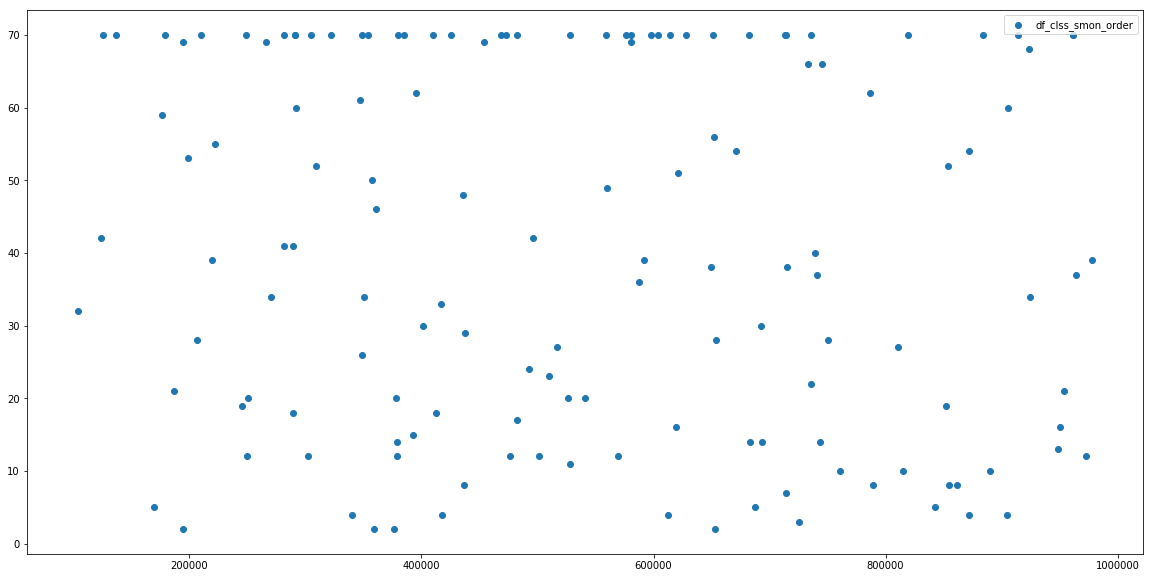

In [31]:
#df_clss_smon_order.plot()
#df_clss_smon_order.plot(x='class_id', y='saled_m')
_x = df_clss_smon_order['class_id']
_y = df_clss_smon_order['saled_m']

plt.figure(figsize=(20,10))
plt.scatter(_x,_y,label='df_clss_smon_order')
plt.legend()
plt.show()


In [36]:

s=dict(zip(_x ,range(len(_x ))))

In [39]:
df_clss_smon_order['class_id_reflect']=0

In [65]:
max(df_clss_smon_order['saled_m'])

70

In [46]:
for i in s:
    df_clss_smon_order.loc[df_clss_smon_order['class_id'] ==i,'class_id_reflect']=s[i]

In [48]:
df_clss_smon_order

,class_id,saled_m,class_id_reflect
39,359378,2,0
41,376193,2,1
91,653436,2,2
8,194201,2,3
103,725137,3,4
127,905061,4,5
83,612523,4,6
53,417803,4,7
32,340175,4,8
124,872180,4,9


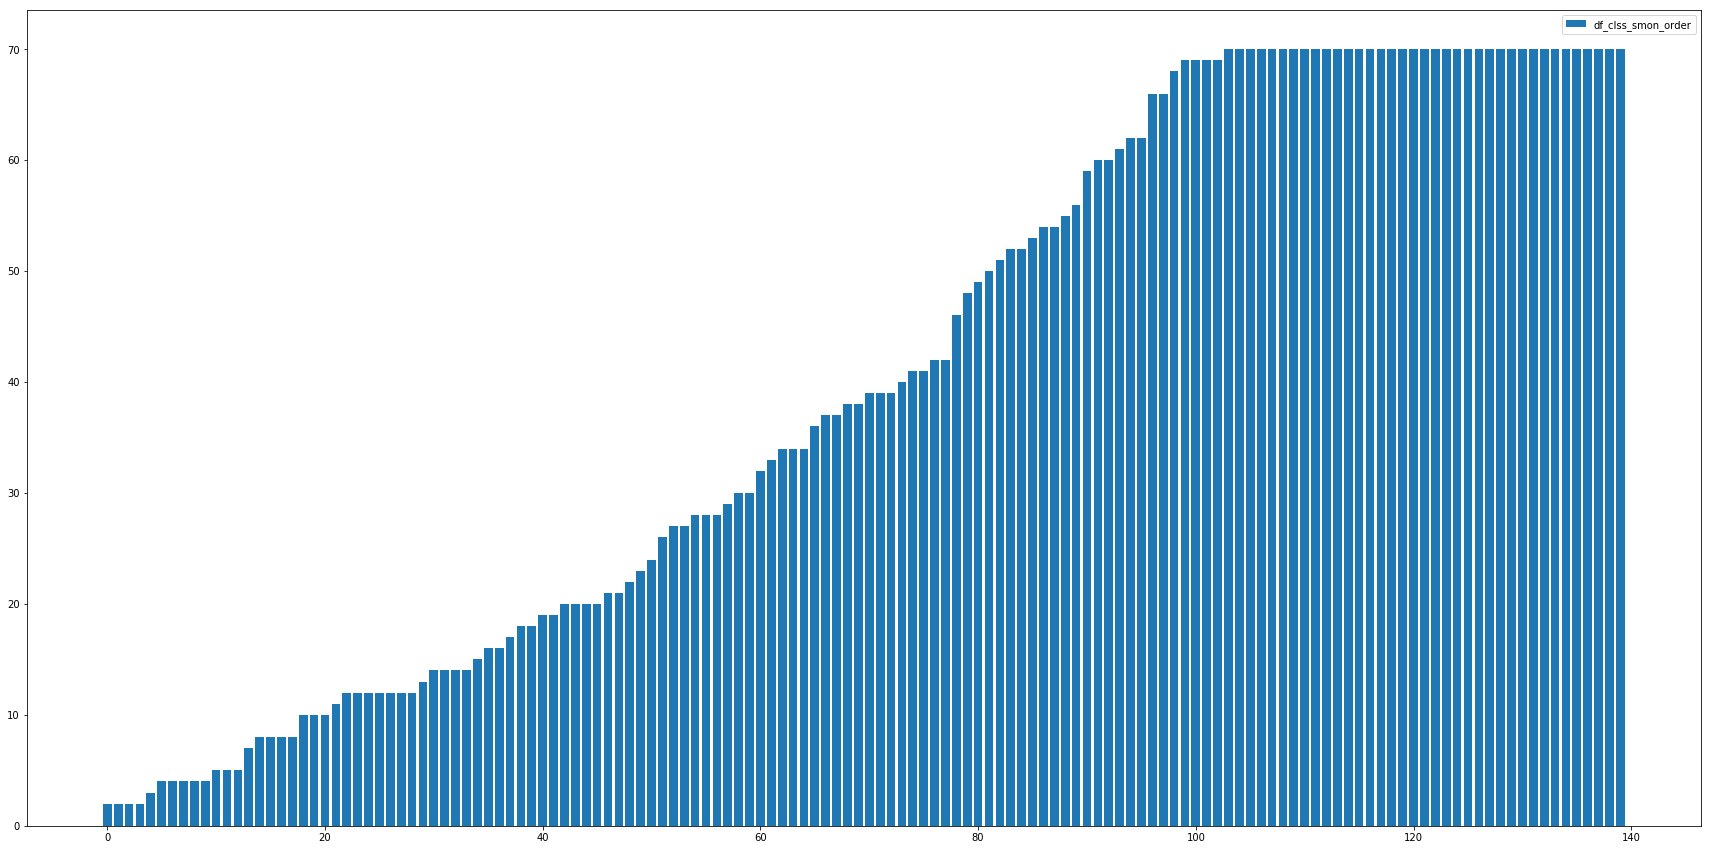

In [52]:
#df_clss_smon_order.plot()
#df_clss_smon_order.plot(x='class_id', y='saled_m')
_x = df_clss_smon_order['class_id_reflect']
_y = df_clss_smon_order['saled_m']

plt.figure(figsize=(30,15))
plt.bar(_x,_y,label='df_clss_smon_order')
plt.legend()
plt.show()

